# Sentiment Analysis Project

### Group 3
### Members:
        Gideon ochieng
        Ann Mwangi
        Victor Masinde
        Lorna Gatimu
        Charles Odhiambo
### Technical mentor : 
        Maryann Mwikali

## Project Overview
Online business platforms like Walmart generate millions of customer reviews daily, influencing purchasing decisions and shaping brand reputations. These reviews offer valuable insights into customer satisfaction, product quality, and service efficiency. Sentiment analysis, a branch of Natural Language Processing (NLP), enables businesses to analyze and interpret customer emotions from text data. By automating this process, companies can enhance customer experience, improve products, and drive sales.

## Business Understanding
### Real-World Problem
With thousands of reviews per product, customers and businesses struggle to extract meaningful insights manually. The challenge lies in identifying positive, negative, or neutral sentiment efficiently. Traditional rating systems (1-5 stars) may not always reflect the true sentiment behind a review, as users may express mixed opinions in text form. A sentiment analysis system can provide a more accurate and automated way of understanding customer feedback, helping businesses enhance their products and services. 

## Stakeholders
This project is valuable to multiple stakeholders, each benefiting in different ways from sentiment analysis of Walmart reviews data.

1) E-commerce Businesses & Product Sellers

- Gain insights into customer satisfaction and product performance.
- Identify recurring complaints and areas for improvement.
- Monitor brand reputation and respond to negative feedback effectively.

2) Consumers & Online Shoppers
- Get data-driven product recommendations based on real customer sentiments.
- Make informed purchasing decisions by understanding overall product sentiment.
- Avoid misleading star ratings by analyzing actual customer experiences.

3) Marketing & Customer Support Teams
- Track customer sentiment trends to refine marketing strategies.
- Automate review analysis to address complaints and improve customer service.
- Identify key influencers and brand advocates from positive reviews.

## Data Understanding

In [1]:
#importing necessary libraries
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


In [2]:
# function to load all the reviews into a pandas dataframe
def load_reviews(Data):
    return pd.read_csv(Data)
# function to merge all reviews to one dataframe
def merge_reviews(review_files):
    reviews=pd.concat([load_reviews(file) for file in review_files], ignore_index=True)
    return reviews

review_files=['Data/computer_reviews.csv','Data/Fridge_reviews.csv','Data/hoodie_reviews.csv','Data/parfum_reviews.csv','Data/Playstation_reviews.csv','Data/shoes_reviews.csv','Data/toy_reviews.csv','Data/Water_reviews.csv','Data/Xbox_reviews.csv']

#merging the listed reviews data
df=merge_reviews(review_files)
df.head()

,Unnamed: 0,product_name,review_text,product_rating,review_date,avg_rating
0,0,Microsoft Xbox Series S – 1TB White,The series S will set you up to game for years...,5,10/31/2024,4.8
1,1,Microsoft Xbox Series S – 1TB White,"Ordered Xbox series S, received a PS5 controll...",5,12/17/2024,4.8
2,2,Microsoft Xbox Series S – 1TB White,"This product is absolutely amazing, the loadin...",5,2/1/2025,4.8
3,3,Microsoft Xbox Series S – 1TB White,This console works fantastic. I was easily abl...,5,11/1/2024,4.8
4,4,Microsoft Xbox Series S – 1TB White,This product was the least expensive from the ...,5,12/11/2024,4.8


In [3]:
# the first few data
df.head()

,Unnamed: 0,product_name,review_text,product_rating,review_date,avg_rating
0,0,Microsoft Xbox Series S – 1TB White,The series S will set you up to game for years...,5,10/31/2024,4.8
1,1,Microsoft Xbox Series S – 1TB White,"Ordered Xbox series S, received a PS5 controll...",5,12/17/2024,4.8
2,2,Microsoft Xbox Series S – 1TB White,"This product is absolutely amazing, the loadin...",5,2/1/2025,4.8
3,3,Microsoft Xbox Series S – 1TB White,This console works fantastic. I was easily abl...,5,11/1/2024,4.8
4,4,Microsoft Xbox Series S – 1TB White,This product was the least expensive from the ...,5,12/11/2024,4.8


In [4]:
#Structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7095 entries, 0 to 7094
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7095 non-null   int64  
 1   product_name    7095 non-null   object 
 2   review_text     7069 non-null   object 
 3   product_rating  7095 non-null   int64  
 4   review_date     7095 non-null   object 
 5   avg_rating      7095 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 332.7+ KB


In [5]:
#numerical columns statistics
df.describe()

,Unnamed: 0,product_rating,avg_rating
count,7095.000000,7095.000000,7095.000000
mean,446.683016,3.547710,4.244355
std,309.009040,1.724285,0.612714
min,0.000000,1.000000,1.000000
25%,197.000000,1.000000,4.000000
50%,397.000000,5.000000,4.500000
75%,645.000000,5.000000,4.700000
max,1373.000000,5.000000,5.000000


In [6]:
#datatypes of the columns
df.dtypes 

Unnamed: 0          int64
product_name       object
review_text        object
product_rating      int64
review_date        object
avg_rating        float64
dtype: object

In [7]:
#number of unique values in each column
df.nunique() 

Unnamed: 0        1374
product_name       683
review_text       5662
product_rating       5
review_date        945
avg_rating         157
dtype: int64

In [8]:
# Value counts for the reviews column
df['review_text'].value_counts().sum()


7069

In [9]:
#correlation matrix
df.corr()

,Unnamed: 0,product_rating,avg_rating
Unnamed: 0,1.000000,0.006472,-0.204858
product_rating,0.006472,1.000000,0.357765
avg_rating,-0.204858,0.357765,1.000000


In [10]:
#rows and columns of the dataset
df.shape


(7095, 6)

## Data Cleaning

In [11]:
# checking for missing values
df.isnull().sum()

Unnamed: 0         0
product_name       0
review_text       26
product_rating     0
review_date        0
avg_rating         0
dtype: int64

In [12]:
#remove rows with missing text
df=df.dropna(subset=['review_text'])
df.isnull().sum()

Unnamed: 0        0
product_name      0
review_text       0
product_rating    0
review_date       0
avg_rating        0
dtype: int64

In [13]:
# dropping the unamed column as it is unnecessary
df =df.drop(columns=['Unnamed: 0'])
df.head()

,product_name,review_text,product_rating,review_date,avg_rating
0,Microsoft Xbox Series S – 1TB White,The series S will set you up to game for years...,5,10/31/2024,4.8
1,Microsoft Xbox Series S – 1TB White,"Ordered Xbox series S, received a PS5 controll...",5,12/17/2024,4.8
2,Microsoft Xbox Series S – 1TB White,"This product is absolutely amazing, the loadin...",5,2/1/2025,4.8
3,Microsoft Xbox Series S – 1TB White,This console works fantastic. I was easily abl...,5,11/1/2024,4.8
4,Microsoft Xbox Series S – 1TB White,This product was the least expensive from the ...,5,12/11/2024,4.8


In [14]:
# Convert 'review_date' to datetime format
df['review_date'] = pd.to_datetime(df['review_date'])


In [15]:
df.info() #Structure of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7069 entries, 0 to 7094
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   product_name    7069 non-null   object        
 1   review_text     7069 non-null   object        
 2   product_rating  7069 non-null   int64         
 3   review_date     7069 non-null   datetime64[ns]
 4   avg_rating      7069 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 331.4+ KB


In [16]:
# checking for duplicates
df.duplicated().sum()

1267

In [17]:
#remove duplicates
df=df.drop_duplicates()

In [18]:
# defining a function to clean raw text
def clean_text(text):

  # removing html tags 
  text = re.sub(r'<.*?>', '', text)

  # remove urls
  text = re.sub(r'http\s+|www\S+', '', text)

  # removing non_alphabetic characters and converting to lowercase

  text= re.sub(r'[^a-zA_Z\s]', '', text.lower())

  return text

In [19]:
# Apply the clean_text function to each value in the 'review_text' column
df['review_text']=df['review_text'].apply(clean_text)#applying the clean text function
df.head()

,product_name,review_text,product_rating,review_date,avg_rating
0,Microsoft Xbox Series S – 1TB White,the series s will set you up to game for years...,5,2024-10-31,4.8
1,Microsoft Xbox Series S – 1TB White,ordered xbox series s received a ps controller...,5,2024-12-17,4.8
2,Microsoft Xbox Series S – 1TB White,this product is absolutely amazing the loading...,5,2025-02-01,4.8
3,Microsoft Xbox Series S – 1TB White,this console works fantastic i was easily able...,5,2024-11-01,4.8
4,Microsoft Xbox Series S – 1TB White,this product was the least expensive from the ...,5,2024-12-11,4.8


### Exploratory Data Analysis

In [20]:
# Display the first 5 rows of the DataFrame 
df.head()

,product_name,review_text,product_rating,review_date,avg_rating
0,Microsoft Xbox Series S – 1TB White,the series s will set you up to game for years...,5,2024-10-31,4.8
1,Microsoft Xbox Series S – 1TB White,ordered xbox series s received a ps controller...,5,2024-12-17,4.8
2,Microsoft Xbox Series S – 1TB White,this product is absolutely amazing the loading...,5,2025-02-01,4.8
3,Microsoft Xbox Series S – 1TB White,this console works fantastic i was easily able...,5,2024-11-01,4.8
4,Microsoft Xbox Series S – 1TB White,this product was the least expensive from the ...,5,2024-12-11,4.8


In [21]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [22]:
df.head()

,product_name,review_text,product_rating,review_date,avg_rating
0,Microsoft Xbox Series S – 1TB White,the series s will set you up to game for years...,5,2024-10-31,4.8
1,Microsoft Xbox Series S – 1TB White,ordered xbox series s received a ps controller...,5,2024-12-17,4.8
2,Microsoft Xbox Series S – 1TB White,this product is absolutely amazing the loading...,5,2025-02-01,4.8
3,Microsoft Xbox Series S – 1TB White,this console works fantastic i was easily able...,5,2024-11-01,4.8
4,Microsoft Xbox Series S – 1TB White,this product was the least expensive from the ...,5,2024-12-11,4.8


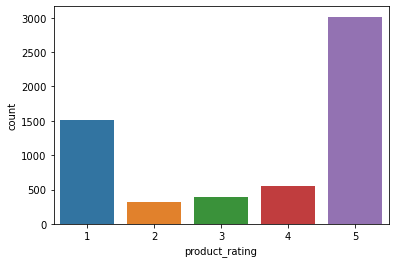

In [23]:
# Create a count plot to visualize the distribution of 'product_rating' values
sns.countplot(data=df, x='product_rating')
plt.show()

In [24]:
# defining a function to clean raw text
import re


def clean_text(text):

  # removing html tags 
  text = re.sub(r'<.*?>', '', text)

  # remove urls
  text = re.sub(r'http\s+|www\S+', '', text)

  # removing non_alphabetic characters and converting to lowercase

  text= re.sub(r'[^a-zA_Z\s]', '', text.lower())

  return text

In [25]:
# Apply the clean_text function to each value in the 'review_text' column
# Store the cleaned text in a new column called 'cleaned_reviews
df['cleaned_reviews'] = df['review_text'].apply(clean_text)

In [26]:
# initializing stopwords and lammetizer
stopwords = set(stopwords.words('english'))
lammatizer = WordNetLemmatizer()

In [27]:
def preprocess_text(text):
  """
  Tokenize cleaned text, remove stopwords and perform lammatization
  """

  # Split the text into individual words (tokens)
  tokens = text.split()

  # Apply lemmatization to each word and remove stopwords
  tokens = [lammatizer.lemmatize(word) for word in tokens if word not in stopwords]

  # Join the processed words back into a single string
  return ' '.join(tokens)

In [28]:
# Apply the preprocess_text function to each value in the 'cleaned_reviews' column
# Store the processed text in a new column called 'preprocessedText
df['preprocessedText'] = df['cleaned_reviews'].apply(preprocess_text)

In [29]:
# Join all the preprocessed text from the 'preprocessedText' column into a single string
all_text = " ".join(df['preprocessedText'])


In [30]:
# Split the joined text into individual words and count the frequency of each word
word_count = Counter(all_text.split())

# Get the 20 most common words along with their counts
most_commons = word_count.most_common(20)
# Creating dataframe for easy visualization

most_common_df = pd.DataFrame(most_commons, columns=['word', 'count'])
most_common_df.head()

,word,count
0,one,1289
1,like,1262
2,love,1215
3,great,1198
4,size,1062


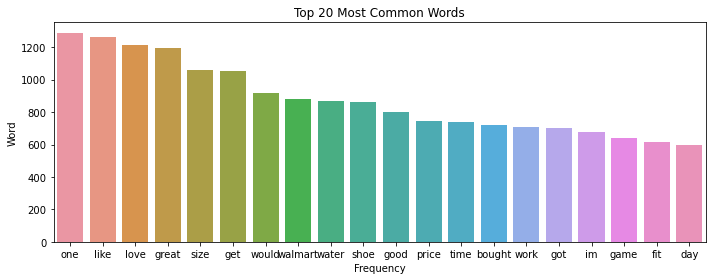

In [31]:
#visualization
plt.figure(figsize=(10,4))
sns.barplot(x='word', y = 'count' ,data = most_common_df)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 20 Most Common Words")
plt.tight_layout()
plt.show()

In [32]:
from wordcloud import WordCloud

# Generate the word cloud from the preprocessed text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10,6))
# Display the word cloud image with bilinear interpolation for smoothness
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

AttributeError: 'TransposedFont' object has no attribute 'getbbox'

In [33]:
# Create a new column 'review_length' that stores the number of words in each review
df['review_length'] = df['review_text'].apply(lambda x:len(x.split()))

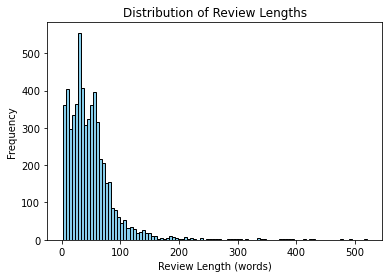

In [34]:
# Create a histogram to visualize the distribution of review lengths
plt.hist(df["review_length"], bins=100, color="skyblue", edgecolor="black")
plt.xlabel("Review Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

<ipython-input-35-335868f484a0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["year_month"] = df_filtered["review_date"].dt.to_period("M")


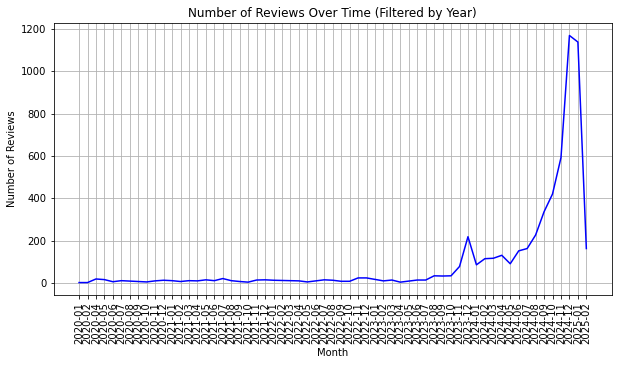

In [35]:
# Convert review_date to datetime format
df["review_date"] = pd.to_datetime(df["review_date"])

# Define the valid year range
min_year = 2020
max_year = 2025

# Extract year and filter data
df["year"] = df["review_date"].dt.year
df_filtered = df[(df["year"] >= min_year) & (df["year"] <= max_year)]

# Extract year-month for
# Extract year-month for grouping
df_filtered["year_month"] = df_filtered["review_date"].dt.to_period("M")

# Count reviews per month
reviews_per_month = df_filtered["year_month"].value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(10,5))
plt.plot(reviews_per_month.index.astype(str), reviews_per_month.values, linestyle="-", color="b")

# Formatting
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews Over Time (Filtered by Year)")
plt.grid(True)

# Show plot
plt.show()

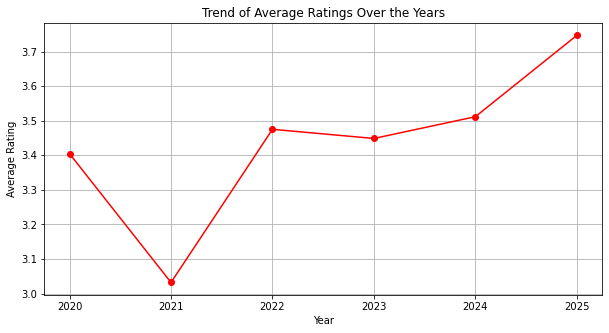

In [36]:
# Compute average rating per year
avg_rating_per_year = df_filtered.groupby("year")["product_rating"].mean()

# Plot rating trends over time
plt.figure(figsize=(10,5))
plt.plot(avg_rating_per_year.index, avg_rating_per_year.values, marker="o", linestyle="-", color="r")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Trend of Average Ratings Over the Years")
plt.grid(True)
plt.show()

<ipython-input-37-6f1fa0939dc6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["product_rating"] = pd.to_numeric(df_filtered["product_rating"], errors='coerce')


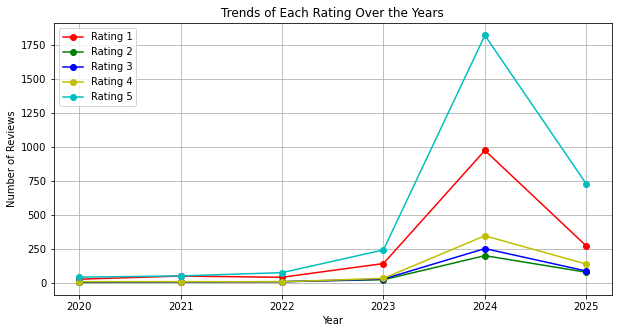

In [37]:
# Ensure product_rating is numeric
df_filtered["product_rating"] = pd.to_numeric(df_filtered["product_rating"], errors='coerce')

# Plot trends for each rating (1-5 stars) on the same figure
plt.figure(figsize=(10,5))
colors = ['r', 'g', 'b', 'y', 'c']
for rating, color in zip(range(1, 6), colors):
    rating_trend = df_filtered[df_filtered["product_rating"] == rating].groupby("year").size()
    plt.plot(rating_trend.index, rating_trend.values, marker="o", linestyle="-", label=f"Rating {rating}", color=color)

plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Trends of Each Rating Over the Years")
plt.legend()
plt.grid(True)
plt.show()

modelling

In [38]:
import pandas as pd
import os
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Directory containing CSV files
data_dir = "Data/"
csv_files = [
    "computer_reviews.csv", "Fridge_reviews.csv", "hoodie_reviews.csv", "parfum_reviews.csv", 
    "Playstation_reviews.csv", "shoes_reviews.csv", "toy_reviews.csv", "Water_reviews.csv", "Xbox_reviews.csv"
]

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment
def get_sentiment(text):
    sentiment = analyzer.polarity_scores(str(text))  # Convert text to string to avoid errors
    return sentiment['compound']

# Classify overall sentiment based on the compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Iterate through each CSV file and apply sentiment analysis
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)

        # Apply sentiment analysis to the 'review_text' column
        df['compound_score'] = df['review_text'].apply(get_sentiment)
        df['sentiment'] = df['compound_score'].apply(classify_sentiment)

        # Save the updated DataFrame to a new CSV
        output_path = os.path.join(data_dir, f"sentiment_{file}")
        df.to_csv(output_path, index=False)

        print(f"Sentiment analysis completed and saved to '{output_path}'")
    else:
        print(f"File '{file_path}' not found.")


Sentiment analysis completed and saved to 'Data/sentiment_computer_reviews.csv'
Sentiment analysis completed and saved to 'Data/sentiment_Fridge_reviews.csv'
Sentiment analysis completed and saved to 'Data/sentiment_hoodie_reviews.csv'
Sentiment analysis completed and saved to 'Data/sentiment_parfum_reviews.csv'
Sentiment analysis completed and saved to 'Data/sentiment_Playstation_reviews.csv'
Sentiment analysis completed and saved to 'Data/sentiment_shoes_reviews.csv'
Sentiment analysis completed and saved to 'Data/sentiment_toy_reviews.csv'
Sentiment analysis completed and saved to 'Data/sentiment_Water_reviews.csv'
Sentiment analysis completed and saved to 'Data/sentiment_Xbox_reviews.csv'


In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from IPython.display import display

# Directory containing the sentiment CSV files
data_dir = "Data/"
csv_files = [
    "sentiment_computer_reviews.csv", "sentiment_Fridge_reviews.csv", "sentiment_hoodie_reviews.csv", 
    "sentiment_parfum_reviews.csv", "sentiment_Playstation_reviews.csv", "sentiment_shoes_reviews.csv", 
    "sentiment_toy_reviews.csv", "sentiment_Water_reviews.csv", "sentiment_Xbox_reviews.csv"
]

# Initialize an empty list to store sentiment counts
sentiment_summary = []

# Loop through each CSV file and count sentiment types
for file in csv_files:
    file_path = os.path.join(data_dir, file)
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        if 'sentiment' in df.columns:
            sentiment_counts = df['sentiment'].value_counts()
            product_name = os.path.splitext(file)[0]
            
            # Add sentiment counts and pie chart path
            pie_chart_path = f"{product_name}_pie_chart.png"
            sentiment_summary.append({
                'Product': product_name,
                'Positive': sentiment_counts.get('Positive', 0),
                'Neutral': sentiment_counts.get('Neutral', 0),
                'Negative': sentiment_counts.get('Negative', 0),
                'Pie_Chart': pie_chart_path
            })

            # Generate and save pie chart
            plt.figure(figsize=(6, 6))
            sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['#9CDEB7', '#F6846F', '#FFEB66'], startangle=90)
            plt.title(f'Sentiment Distribution for {product_name}')
            plt.ylabel('')  # Hide the y-axis label
            plt.tight_layout()
            plt.savefig(os.path.join(data_dir, pie_chart_path))
            plt.close()

# Convert the summary list to a DataFrame
summary_df = pd.DataFrame(sentiment_summary)

# Display the summary table in the notebook
display(summary_df)

# Save the summary table to a CSV file
#summary_csv_path = os.path.join(data_dir, 'sentiment_summary_with_pie_charts.csv')
#summary_df.to_csv(summary_csv_path, index=False)

#print(f"Sentiment summary with pie chart references saved to '{summary_csv_path}'")


,Product,Positive,Neutral,Negative,Pie_Chart
0,sentiment_computer_reviews,215,45,106,sentiment_computer_reviews_pie_chart.png
1,sentiment_Fridge_reviews,563,48,189,sentiment_Fridge_reviews_pie_chart.png
2,sentiment_hoodie_reviews,906,37,106,sentiment_hoodie_reviews_pie_chart.png
3,sentiment_parfum_reviews,489,32,145,sentiment_parfum_reviews_pie_chart.png
4,sentiment_Playstation_reviews,522,80,190,sentiment_Playstation_reviews_pie_chart.png
5,sentiment_shoes_reviews,785,31,101,sentiment_shoes_reviews_pie_chart.png
6,sentiment_toy_reviews,380,19,40,sentiment_toy_reviews_pie_chart.png
7,sentiment_Water_reviews,394,88,210,sentiment_Water_reviews_pie_chart.png
8,sentiment_Xbox_reviews,805,192,377,sentiment_Xbox_reviews_pie_chart.png


Sentiment summary with pie chart references saved to 'Data/sentiment_summary_with_pie_charts.csv'


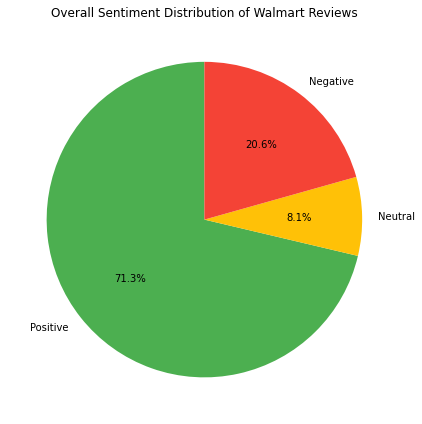

Overall sentiment plot saved as 'Data/overall_sentiment_distribution.png'


In [42]:
# Plot a pie chart for overall sentiment distribution
total_sentiments = summary_df[['Positive', 'Neutral', 'Negative']].sum()

plt.figure(figsize=(6, 6))
total_sentiments.plot.pie(autopct='%1.1f%%', colors=['#4CAF50', '#FFC107', '#F44336'], startangle=90, legend=False)
plt.title('Overall Sentiment Distribution of Walmart Reviews')
plt.ylabel('')  # Hide the y-axis label for cleaner presentation
plt.tight_layout()

# Save the plot as a PNG image
plot_filename = "overall_sentiment_distribution.png"
plot_path = os.path.join(data_dir, plot_filename)

plt.show()




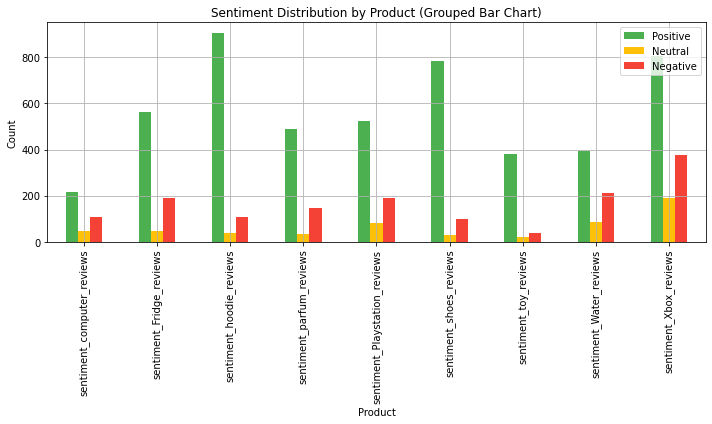

In [41]:
# ========================
# 1️⃣ Bar Plot (Grouped)
# ========================
summary_df.set_index('Product')[['Positive', 'Neutral', 'Negative']].plot(
    kind='bar', figsize=(10, 6), color=['#4CAF50', '#FFC107', '#F44336']
)
plt.title('Sentiment Distribution by Product (Grouped Bar Chart)')
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

plt.show()